Epoch 1/200
20/20 [==============================] - 0s 4ms/step - loss: 1.2033 - accuracy: 0.0500
Epoch 2/200
20/20 [==============================] - 0s 955us/step - loss: 1.1093 - accuracy: 0.0500
Epoch 3/200
20/20 [==============================] - 0s 959us/step - loss: 1.0393 - accuracy: 0.0500
Epoch 4/200
20/20 [==============================] - 0s 967us/step - loss: 0.9841 - accuracy: 0.0500
Epoch 5/200
20/20 [==============================] - 0s 970us/step - loss: 0.9441 - accuracy: 0.0500
Epoch 6/200
20/20 [==============================] - 0s 955us/step - loss: 0.9094 - accuracy: 0.0500
Epoch 7/200
20/20 [==============================] - 0s 991us/step - loss: 0.8796 - accuracy: 0.0500
Epoch 8/200
20/20 [==============================] - 0s 1ms/step - loss: 0.8540 - accuracy: 0.0500
Epoch 9/200
20/20 [==============================] - 0s 948us/step - loss: 0.8320 - accuracy: 0.0500
Epoch 10/200
20/20 [==============================] - 0s 1ms/step - loss: 0.8134 - accuracy: 0.

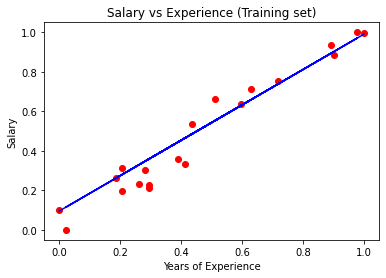

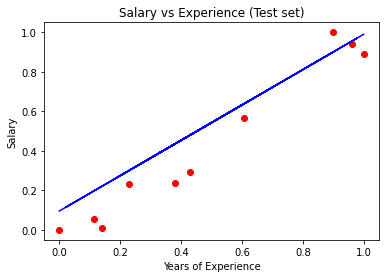

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x, y, test_size = 1/3)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

xtr = sc.fit_transform(xtr)
ytr = sc.fit_transform(ytr.reshape(-1,1))
xte = sc.fit_transform(xte)
yte = sc.fit_transform(yte.reshape(-1,1))

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers


regressor = Sequential()
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1,bias_initializer=initializers.Constant(0.1)))
regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
regressor.fit(xtr, ytr, batch_size = 1, epochs = 200)


y_plot=regressor.predict(xtr)
#y_plot=sc.inverse_transform(y_plot)
#training
plt.scatter(xtr, ytr, color = 'red')
plt.plot(xtr, y_plot, color = 'blue') 
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# test
plt.scatter(xte, yte, color = 'red')
plt.plot(xtr, y_plot, color = 'blue')#training needs to be plotted, not test.
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()